# Chapter 3

### Radiation physics

In [1]:
%matplotlib notebook
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interact_manual

In [2]:
plt.rcParams['font.size'] = 12

In [3]:
planck=lambda x,temp: 5e-24/(x*1e-6)**5/(np.exp(0.0144/(temp*x*1e-6)) - 1)*75.1

In [4]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
#     if wavelength >= 380 and wavelength <= 750:
#         A = 1.
#     else:
#         A=1.

    R = 1
    G = 1
    B = 1
    A = 1
    
#     if wavelength < 380:
#         wavelength = 380.
#     if wavelength >750:
#         wavelength = 750.

    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0

    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

## blackbody radiation

As discussed in the book, everything glows via blackbody radiation.  And the wavelength of the glow is determined by the object's temperature.

The plot below shows how the blackbody spectrum changes as the object's temperature changes.  The hotter object, the shorter the wavelength \[Dash] the colored area denotes the visible portion of the electromagnetic spectrum.   As you move the slider back and forth, the temperature will vary between 255 K (the temperature of the Earth with no atmosphere) and 6000 K (the blackbody temperature of the Sun).

In [4]:
## code goes here

**Question 1**:  At what temperature can you begin to see the object glow?  
**Question 2**: What is the relationship between the wavelength of the peak of the spectrum and the temperature?  Select a few temperatures and derive/verify this relation.

Summing over all wavelengths, the amount of energy emitted by a blackbody is equal to $\sigma T^4$.  Thus, as the temperature goes up, the total amount of energy emitted by the blackbody also goes up rapidly.  This could have been seen in the example above as the rapid rescaling of the y-axis as the temperature changed.  This can be seen more clearly in the left-hand plot of the following example, where I have fixed the axes so that change in emission energy becomes readily apparent.  The eagle-eyed observer will also see the slight shift of the peak of the emission spectrum to the left as the temperature increases.  In the right-hand plot, the total energy emitted by the blackbody is plotted as a function of temperature. 

In [10]:
wv=np.linspace(0.1,10,1000)

def func_plot(temp=1300):
    fig,axes=plt.subplots(1,2,figsize=(12,5))
    plt.subplots_adjust(wspace=0.3)

    # left-hand panel: spectrum
    sca(axes[0])
    out1=planck(wv,temp)/1e3
    plot(wv,out1)
    ylim(0,140)
    xlim(0,8)
    xlabel('wavelength ($\mu m$)')
    ylabel('power/area/micron ($kW/m^2/\mu m$)')
    
    mu_max=2897/temp
    plot([mu_max],[planck(mu_max,temp)/1e3],'o',color='#1f77b4')
    axvline(mu_max,color='#1f77b4',ls=':')
    
    # left-hand panel: spectrum
    sca(axes[1])
    plot(np.arange(1000,1600),np.arange(1000,1600)**4*5.67e-8/1e3)
    plot([temp],[temp**4*5.67e-8/1e3],'o',color='r',markersize=20)
    xlabel('temperature (K)')
    ylabel('power/area ($kW/m^2$)')
    ylim(0,400)

In [14]:
interact?

In [13]:
interact(func_plot,temp=(1000,1600,50),continuous_update=False);

interactive(children=(IntSlider(value=1300, description='temp', max=1600, min=1000, step=100), Output()), _dom…

<IPython.core.display.Javascript object>


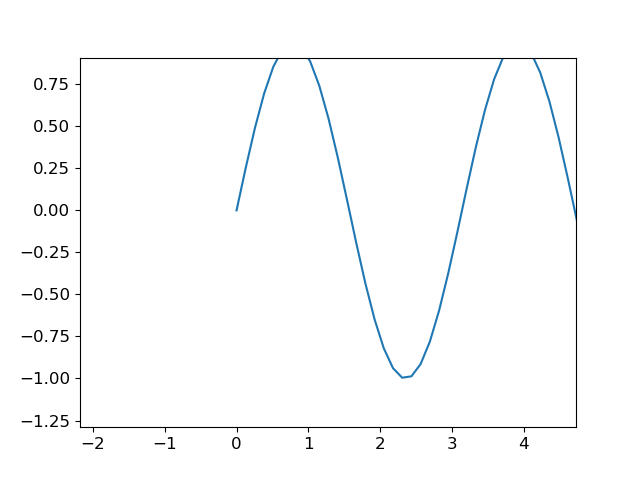

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [4]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

<IPython.core.display.Javascript object>


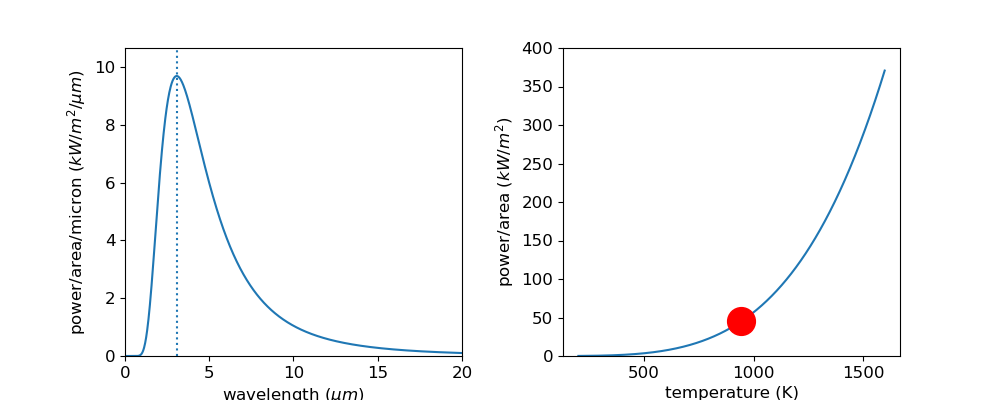

interactive(children=(IntSlider(value=900, description='temp1', max=1600, min=200, step=5), IntSlider(value=15…

In [45]:
wv=np.linspace(0.1,20,1000)
temp=900

fig,axes=plt.subplots(1,2,figsize=(10,4))
plt.subplots_adjust(wspace=0.3)

# left-hand panel: spectrum
sca(axes[0])
out1=planck(wv,temp)/1e3
line1,=gca().plot(wv,out1)
ylim(0,140)
xlim(0,8)
xlabel('wavelength ($\mu m$)')
ylabel('power/area/micron ($kW/m^2/\mu m$)')

mu_max=2897/temp
# plot([mu_max],[planck(mu_max,temp)/1e3],'o',color='#1f77b4')
line1b,=plot([mu_max,mu_max],[0,140],color='#1f77b4',ls=':')

# left-hand panel: spectrum
sca(axes[1])
plot(np.arange(200,1600),np.arange(200,1600)**4*5.67e-8/1e3)
line2,=plot([temp],[temp**4*5.67e-8/1e3],'o',color='r',markersize=20)
xlabel('temperature (K)')
ylabel('power/area ($kW/m^2$)')
ylim(0,400)

def update(temp1 = (200,1600,5), max_x = (10,20,1), fixed_y=False):
    ydata1=planck(wv,temp1)/1e3
    line1.set_ydata(ydata1)
    line1b.set_xdata([2897/temp1,2897/temp1])
    line2.set_xdata([temp1])
    line2.set_ydata([temp1**4*5.67e-8/1e3])
    ax1=fig.axes
    ax1[0].set_xlim(0,max_x)
    if not fixed_y:
        ax1[0].set_ylim(0,np.max(ydata1)*1.1)
    else:
        ax1[0].set_ylim(0,140)
#     fig.canvas.draw_idle()        

interact(update);

## conservation of energy

Understanding energy balance is crucial for understanding the climate system.  If energy in ($E_{in}$) exceeds energy out ($E_{out}$), then the object is warming up. If $E_{out}$ exceeds $E_{in}$, then the object is cooling off.  If they are equal, then the temperature of the object is not changing.  

In the example below, we consider energy balance of an arbitrary object.  $E_{in}$ is controlled by the slider — importantly, it is not a function of the object's temperature.  $E_{out}$ is equal to $\sigma T^4$, so it is a function of temperature.  An example of this situation is a turkey in an oven.  $E_{in}$ for the turkey is set by the oven temperature (controlled by the cook), while $E_{out}$ is set by the turkey's temperature.

The lower slider controls the object's temperature.  There is a single temperature where $E_{in}$ equals $E_{out}$.  At this temperature, it is at equilibrium and the temperature remains there.  For temperatures above that equilibrium temperature, the object is cooling, as indicated by the black arrow that appears.  And for temperatures below that equilibrium, the object is warming.

In [31]:
def func_plot(ein=238,temp=255):
    fig=figure(figsize=(10,7))

    plot(np.linspace(200,300),np.zeros(50)+ein)
    plot(np.linspace(200,300),5.67e-8*np.linspace(200,300)**4)
    plot(temp,5.67e-8*temp**4,marker='o',color='r',markersize=20)
    ylim(150,350)
    xlim(200,300)
    text(267,325,'$E_{out}$',fontsize=18)
    text(205,ein+5,'$E_{in}$',fontsize=18)
    if ein - 5.67e-8*temp**4 > 2:
            text(280,160,'$E_{in} > E_{out}$',fontsize=18)
    elif 5.67e-8*temp**4 - ein > 2:
            text(280,160,'$E_{out} > E_{in}$',fontsize=18)
    else:
            text(280,160,'$E_{in} = E_{out}$',fontsize=18)


#     arrow(temp,5.67e-8*temp**4,3,3*4*5.67e-8*temp**3)
    
interact(func_plot,temp=(200,300,3),ein=(200,300,10));

interactive(children=(IntSlider(value=238, description='ein', max=300, min=200, step=10), IntSlider(value=255,…